Importing libraries

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np

Importing classes

In [2]:
#CMAB
from Strategies.RLinUCB                    import RLinUCB
from Strategies.RLinUCBGlobal              import RLinUCBGlobal
from Strategies.RCLinUCB                   import RCLinUCB
#Rewards
from Strategies.Rewards.BernoulliFeature   import BernoulliFeature

Init Parameters

In [3]:
iterations = 5000
experimentos = 1
k = 100
d = 2
alpha = 1
user_amount = 20
max_prob = 0.3
noise = 0.05
clusters_amounts = [1,2,4,8]
gree = math.radians(30)
aux = [math.cos(gree), math.sin(gree)]
aux /= np.linalg.norm(aux)
aux2 = [math.cos(-gree), math.sin(-gree)]
aux2 /= np.linalg.norm(aux2)
best_theta = [[1, 0], [0,1]]
lamb = 1

sup_percentile = 75
inf_percentile = 25

Init

In [4]:
reward_class = BernoulliFeature(k, d,user_amount, max_prob, noise, best_theta)

In [5]:
# Run experiments
linucb_regrets              = np.zeros((experimentos,iterations))
linucb_g_regrets              = np.zeros((experimentos,iterations))
linucb_cluster_regrets       = np.zeros((experimentos,iterations))
# Run experiments
for i in    range(experimentos):
    print('exp: ' + str(i + 1) + '/' + str(experimentos))

    #club      = CLUB(k, iterations, reward_class, d, user_amount, alpha)
    linucb       = RLinUCB(k, iterations, reward_class, d, user_amount, alpha, lamb )
    linucbg      = RLinUCBGlobal(k, iterations, reward_class, d, user_amount, alpha, lamb )
    linucbk       = RCLinUCB(k, iterations, reward_class, d, user_amount, alpha, clusters_amounts, lamb, 500, 500 )

    #club_regrets[i]           = club.run()
    linucb_cluster_regrets[i]          = linucbk.run()
    linucb_regrets[i]                  = linucb.run()
    linucb_g_regrets[i]                = linucbg.run()


exp: 1/1
0/5000
1000/5000
2000/5000
3000/5000
4000/5000
0/5000
1000/5000
2000/5000
3000/5000
4000/5000
0/5000
1000/5000
2000/5000
3000/5000
4000/5000


In [7]:
#linucb
linucb_inf            = np.percentile(linucb_regrets,inf_percentile ,axis=0)
linucb_median_rew     = np.median(linucb_regrets,axis=0)
linucb_sup            = np.percentile(linucb_regrets,sup_percentile ,axis=0)

linucb_g_inf            = np.percentile(linucb_g_regrets,inf_percentile ,axis=0)
linucb_g_median_rew     = np.median(linucb_g_regrets,axis=0)
linucb_g_sup            = np.percentile(linucb_g_regrets,sup_percentile ,axis=0)

linucb_c_inf            = np.percentile(linucb_cluster_regrets,inf_percentile ,axis=0)
linucb_c_median_rew     = np.median(linucb_cluster_regrets,axis=0)
linucb_c_sup            = np.percentile(linucb_cluster_regrets,sup_percentile ,axis=0)


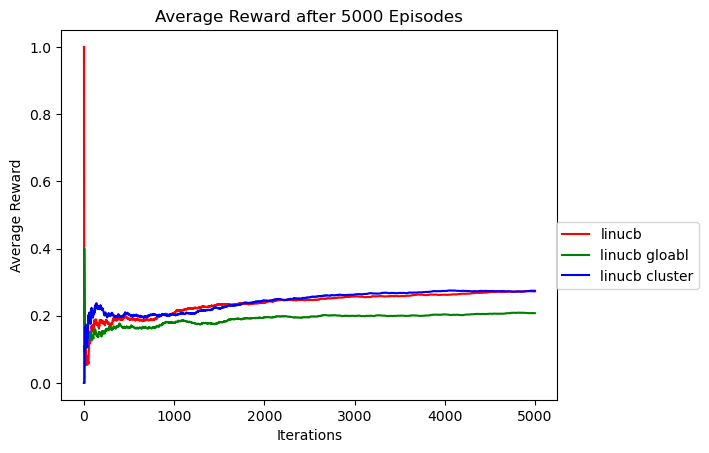

In [8]:
fig, ax = plt.subplots()

transparencia = 0.5

#linucb
plt.plot(linucb_median_rew,label="linucb", color='red')
plt.plot(linucb_g_median_rew,label="linucb gloabl", color='green')
plt.plot(linucb_c_median_rew,label="linucb cluster", color='blue')

plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average Reward after " + str(iterations)
    + " Episodes")
#plt.ylim(0,0.1)
plt.show()


In [9]:
max_prob = np.zeros(user_amount)
for i in range(user_amount):
    max_prob[i] = np.max(reward_class.get_probabilities(i))
print(max_prob)
print(np.average(max_prob))

[0.08999304 0.08977934 0.08995867 0.08998934 0.08997726 0.08997072
 0.08991    0.08995792 0.08999996 0.08999946 0.08999823 0.08993357
 0.08991897 0.08997861 0.08999937 0.08995562 0.08996327 0.08984036
 0.08988824 0.08999798]
0.08995049608749275


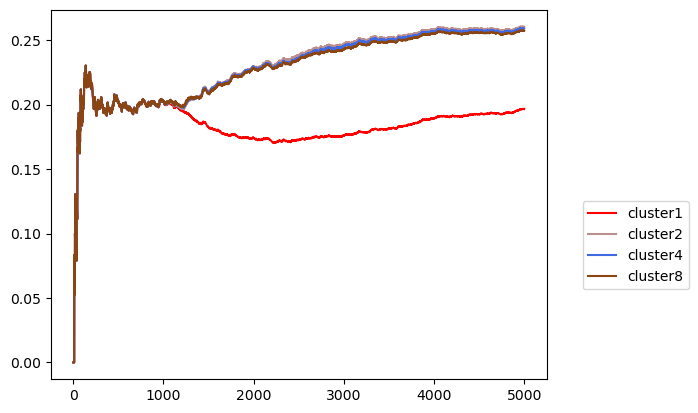

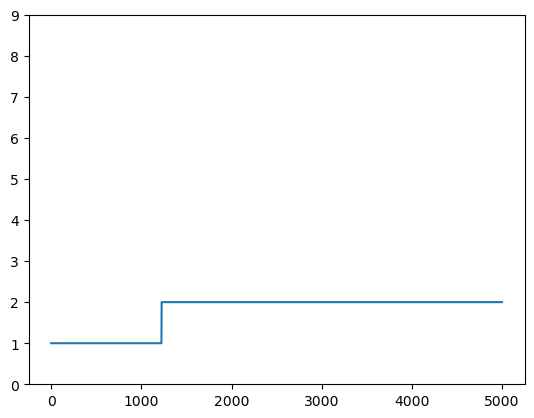

In [10]:
linucbk.get_rc().graph()

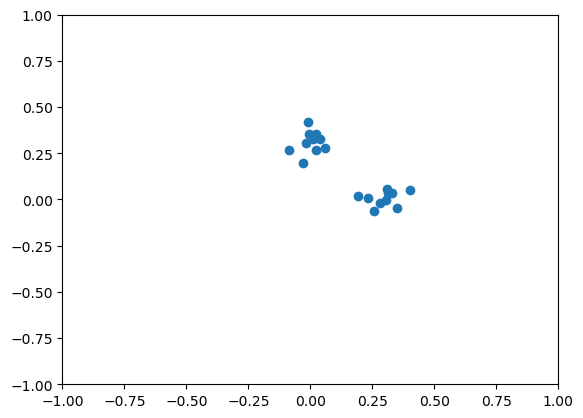

In [11]:
reward_class.graph()

In [ ]:
reward_class.graph_best()

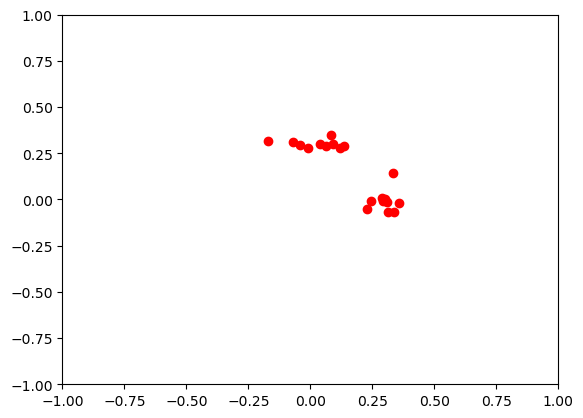

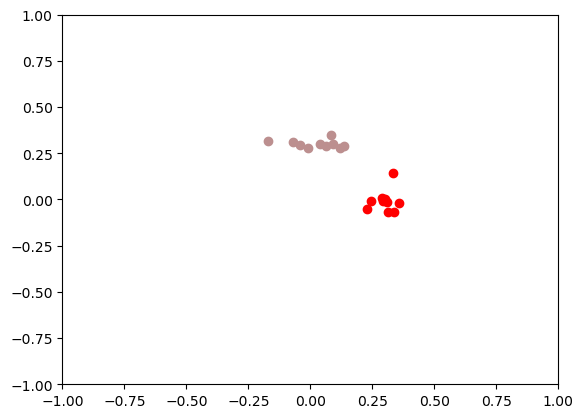

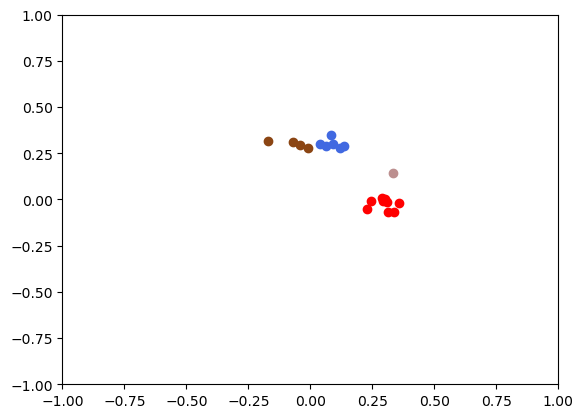

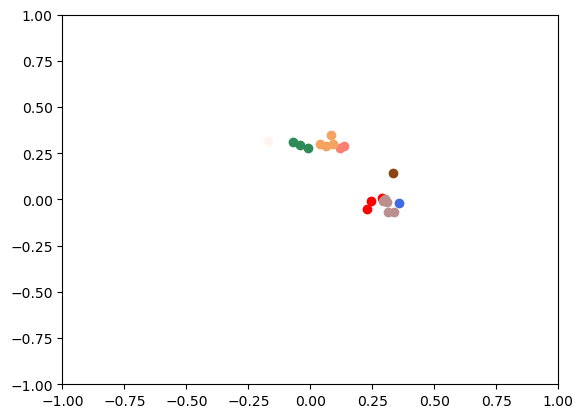

In [12]:
linucbk.get_model().graph()